In [8]:
import AlphaVantage


import numpy as np
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
ApiKey = 'Z0DPEH5EFNHR6W8D'

In [10]:
AAPL = AlphaVantage.Stock('AAPL', 'TIME_SERIES_DAILY', key = 'Z0DPEH5EFNHR6W8D', full=True)
AAPL_df = AAPL.df


Root Mean Squared Error: 1.4615156110809362


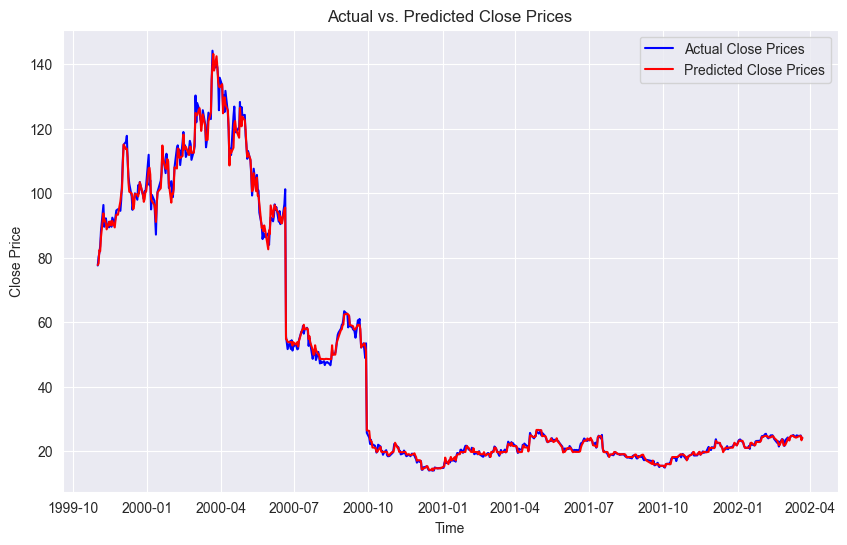

In [11]:
AAPL_df.set_index('time', inplace=True)

# Create lagged features
num_lags = 7  # Using the previous week's data for forecasting
for i in range(1, num_lags + 1):
    AAPL_df[f'lag_{i}_close'] = AAPL_df['close'].shift(i)

# Drop rows with missing values
AAPL_df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.9 * len(AAPL_df))
train_data, test_data = AAPL_df[:train_size], AAPL_df[train_size:]

# Prepare the features and target variable
X_train, y_train = train_data.drop('close', axis=1), train_data['close']
X_test, y_test = test_data.drop('close', axis=1), test_data['close']

# Initialize the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual Close Prices', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Close Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()